<a href="https://colab.research.google.com/github/upam00/Covid-19-Dataset-Mining/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering of States with Similar growth pattern

---
The spread of COVID-19 in India varies depending upon the region. For example the states of South India had peak of second wave at almost similar time. The states of North India had its peak together too. States of northeast had similar outcome with state of Assam. But each of these groups had their pick at different times. For such a data distribution the best clustering technique would be to find the coreation between the stats and then applying a hierarchical clustering   based on the corelation. This notebook performs the following operations in order:
* Get statewise data from public API.
* Calculate corelation between the features(states).
* Generate a corelation matrix.
* Apply hierarchical clustering.
* Get the clusters.


In [ ]:
import requests
import json
import csv
import numpy as np
import pandas as pd
import scipy
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from scipy.cluster.hierarchy import ClusterWarning
from sklearn.cluster import AgglomerativeClustering
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)


# read data
state_wise_daily = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
state_wise_daily.head()
state_wise_daily.to_csv('patients_data.csv', index=False)

#x=state_wise_daily.iloc[::4, :]

#Selceting only the confiremed cases daily
x= state_wise_daily[state_wise_daily.index % 3 == 0]
#Selecting only the state coloumns
y=x.loc[:, ~state_wise_daily.columns.isin(['Date', 'Date_YMD', 'Status', 'DD'])]

#data is now of this type:
print(y)
#plt.figure(figsize=(100,100))
#y.plot.bar(figsize=(100,100))


#finding corelation matrix of states
df=y.corr()
#replacing negative corelations with 0 values
df[df<0]=0
#replacing 1 values with 0
#df[df==1]=0

#Final Correlation matrix
print(df)



         TT  AN    AP   AR    AS   BR  CH  ...    TN    TG   TR   UP   UT    WB  UN
0        81   0     1    0     0    0   0  ...     1     1    0   12    0     0   0
3        27   0     0    0     0    0   0  ...     0     2    0    1    0     0   0
6        15   0     0    0     0    0   0  ...     0     1    0    0    1     0   0
9        11   0     0    0     0    0   0  ...     0     1    0    2    0     1   0
12       37   0     0    0     0    0   0  ...     1     8    0    2    1     0   0
...     ...  ..   ...  ...   ...  ...  ..  ...   ...   ...  ...  ...  ...   ...  ..
1383  60765  28  6341  209  3706  347  48  ...  8633  1417  467  149  222  2788   0
1386  58615  31  5674  231  3571  349  45  ...  8183  1362  443  257  220  2486   0
1389  52978  12  5646  158  1775  294  27  ...  7817  1006  367  219  136  2184   0
1392  42683   9  2620  294  2805  245  14  ...  7427  1197  175  118  163  1879   0
1395  50817  10  4169  289  2869  268  23  ...  6895  1175  421  202  171  1

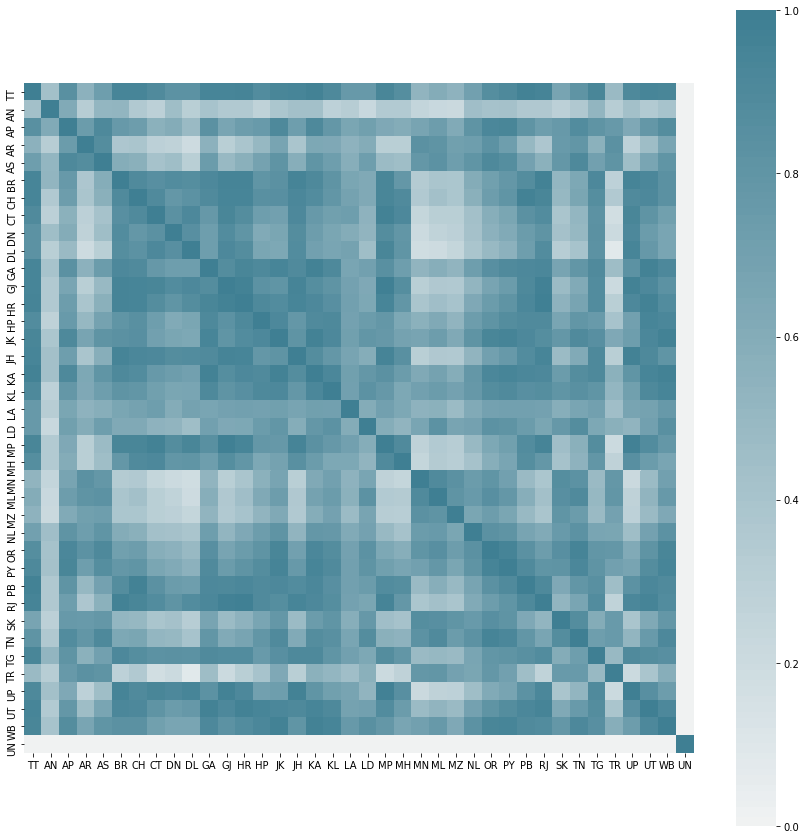

In [ ]:
#Heatmap of the correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(
    df, 
    vmin=0, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

[0 0 0 1 3 0 0 1 0 1 1 3 1 0 1 1 3 2 0 1 0 0 0 2 0 1 2 0 2 2 0 0 0 1 2 0 0
 0]


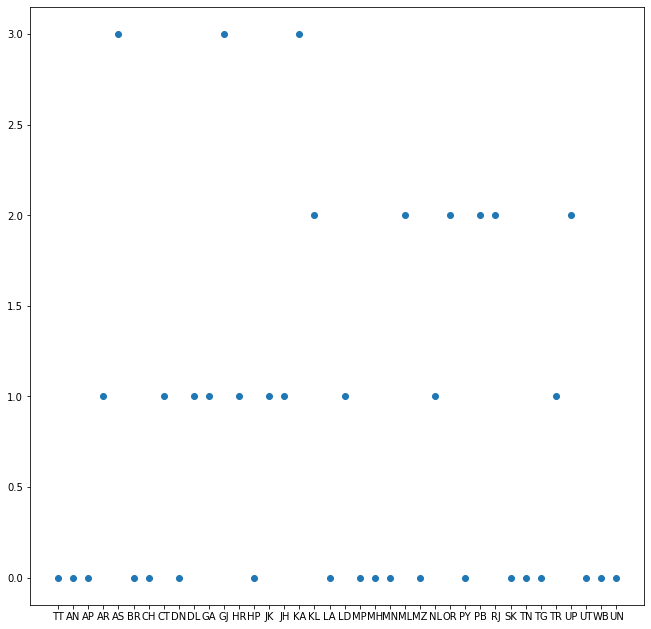

In [ ]:


#converting dataframe to numpy array
arr = df.to_numpy()


# Performing agglomerative clustering.
# The affinity is precomputed (since the distance are precalculated).
# Using 'single' linkage.
agg = AgglomerativeClustering(n_clusters=4, affinity='precomputed',
                              linkage='complete')

# Useing the corelation matrix directly.
u = agg.fit_predict(arr)

#printing output
print(u)

#placing clusters to on a plot
#a dot on the same line means same cluster
X=df.columns.to_list()
plt.figure(figsize=(11,11))
plt.scatter(X, u)




Here we must set the 'linkage' metthod to 'complete' in order to get meaningfull results. Now we randomly take two satates from same cluster and verify similarity of their daily cases graph.

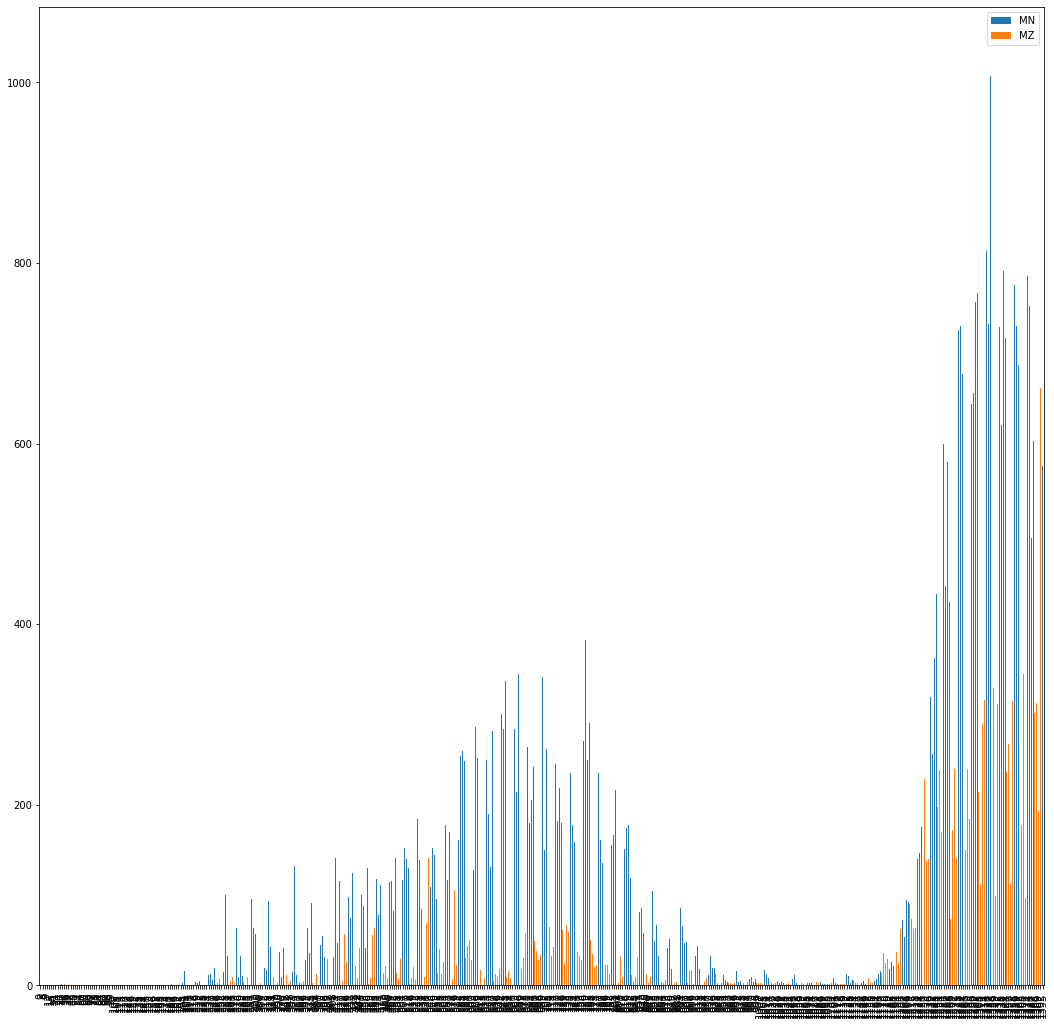

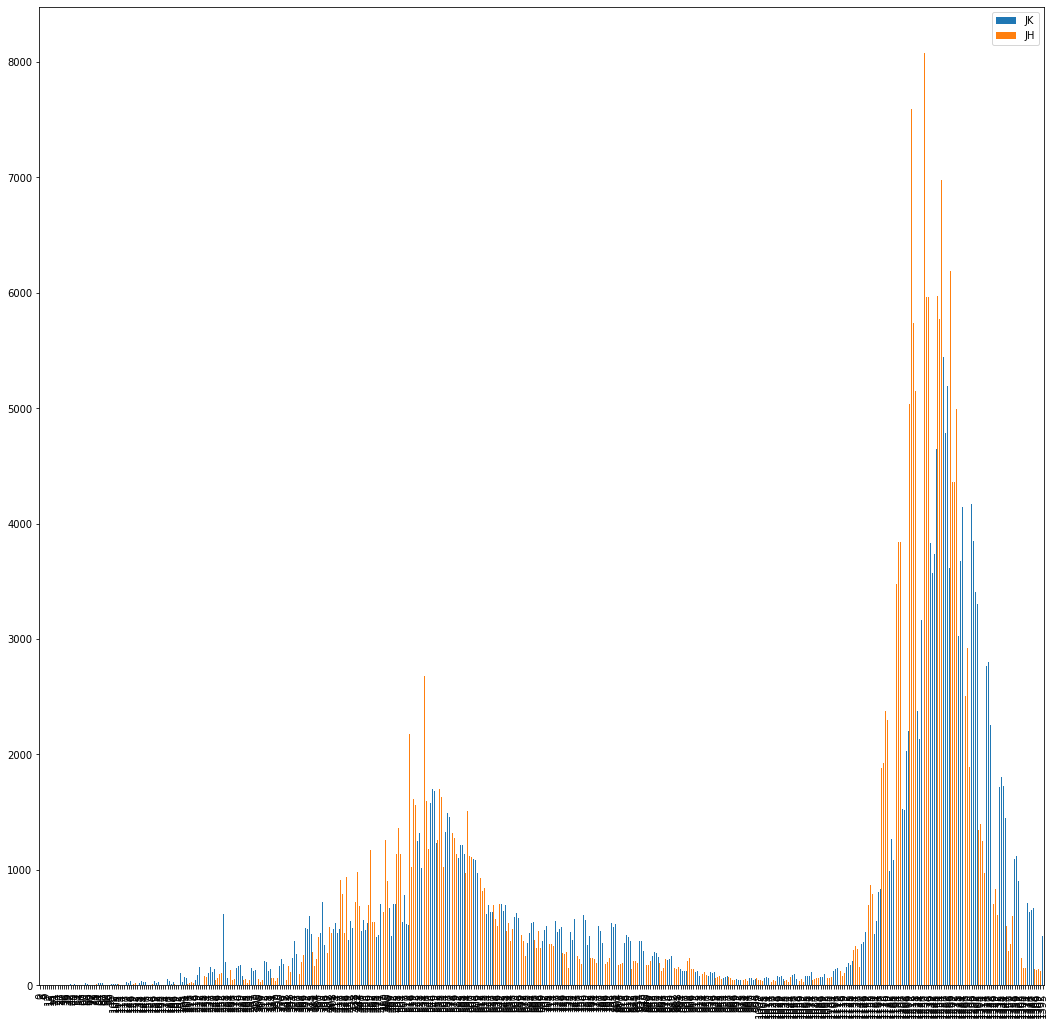

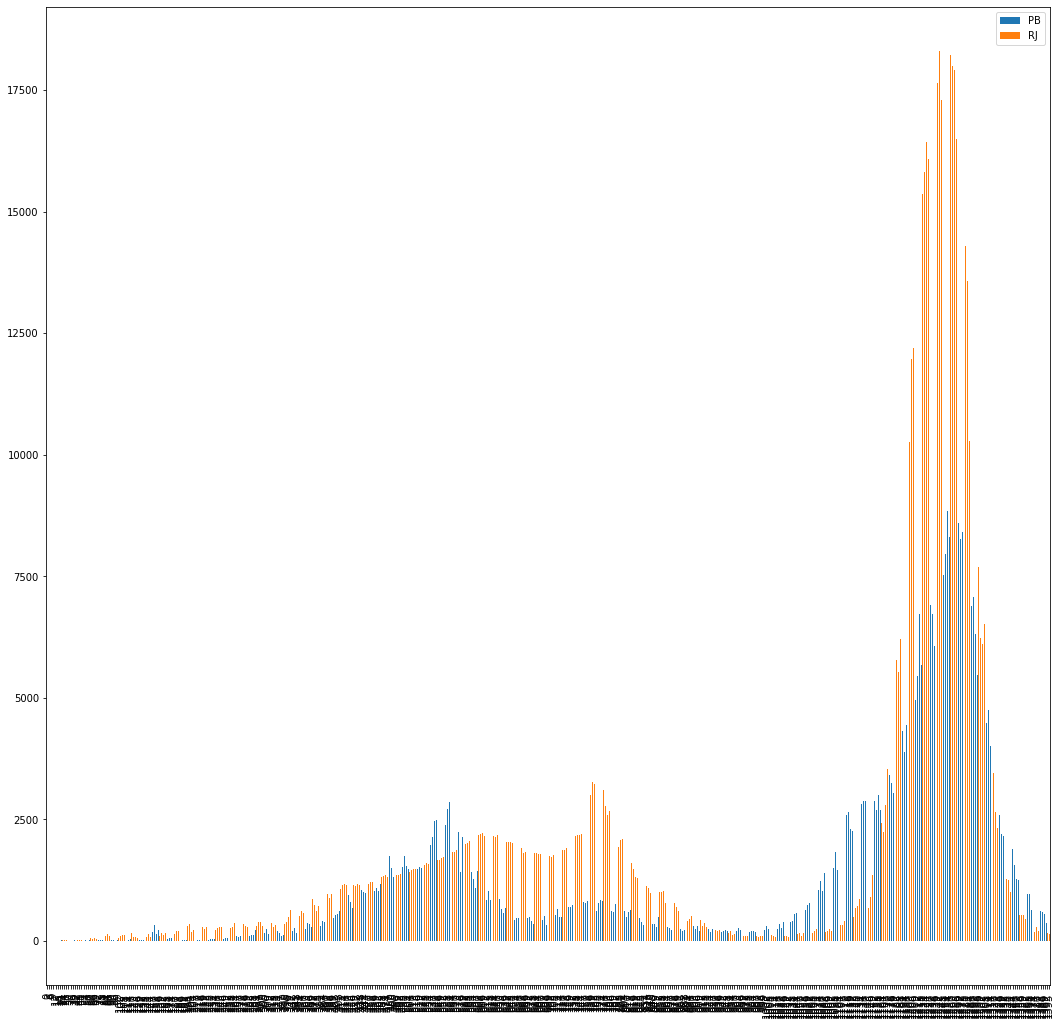

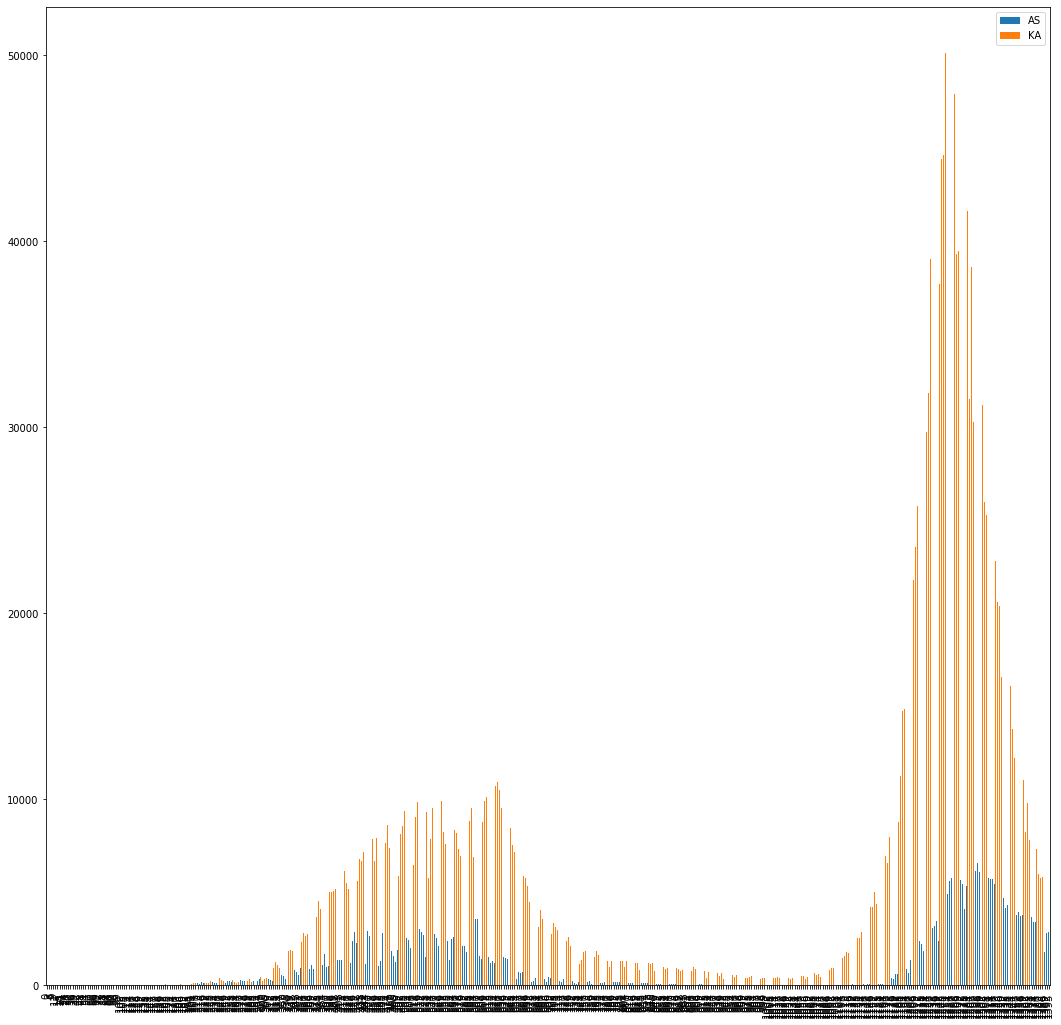

In [ ]:
#MP & MH from cluster 0
#JK & JH form Cluster 1
#PB & RJ from Cluster 2
#AS & KA from cluster 3

y[['MN','MZ']].plot.bar(figsize=(18,18))
y[['JK','JH']].plot.bar(figsize=(18,18))
y[['PB','RJ']].plot.bar(figsize=(18,18))
y[['AS','KA']].plot.bar(figsize=(18,18))

#It can be observed that two states within same cluster has reached peaks at similar times.
